In [1]:
#Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import math
from termcolor import colored
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

 Q.1-1 - 1st Order Polynomial Regression, Optimized Weights are -
 [[ 1.06902915 -1.17653632]]
 Q.1-1 - 1st Order Polynomial Regression, RMSE is - RMSE is - 0.3367611044189652


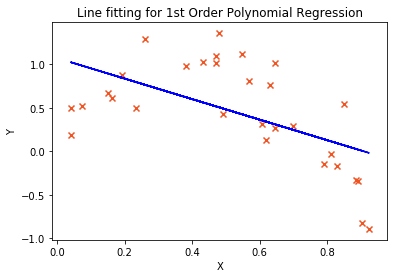

In [2]:
# Q.1-1 - 1st Order Polynomial Regression

# Reading and plotting data
data1 = pd.read_csv('ex2data1.csv', sep=",", encoding='utf-8', header='infer')
df = data1.copy()

def get_rmse(x, y, beta):
    m = len(x)
    inner = np.power(((x * beta.T) - y), 2)
    return math.sqrt(np.sum(inner) / (2 * m))

def drawPlot(Xcord, Ycord, y_pred, order, title):
    plt.scatter(Xcord, Ycord, c='#ef5423', marker='x')
    plt.ylabel('Y');
    plt.xlabel('X');
    temp = 'Line' if order == 1 else 'Curve'
    order = '1st' if order == 1 else '2nd' if order ==2 else '3rd' if order == 3 else str(order)+'th'
    plt.title( temp + ' fitting for ' + order + ' Order Polynomial Regression' + title)
    plt.plot(Xcord, y_pred, c='blue')
    
def normalizeData(df, needSort):
    
    #print(normalized_df.head())
    if(needSort):
        df = df.sort_values(by=['x']) # sort values for plotting sane graph
    Y = df[['y']]
    X = df.drop(['y'], axis=1)
    X = (X-X.mean())/X.std()
    X.insert(0,-1,1)# inserting ones column for beta0
    return X, Y

def gradientDescentUsingMatrix(x, y, beta, learning_rate, iters):  
    temp = np.matrix(np.zeros(beta.shape))
    parameters = int(beta.ravel().shape[1])
    cost = np.zeros(iters)
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    cost_history = []
    for i in range(iters):
        error = (x * beta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = beta[0,j] - ((learning_rate / len(x)) * np.sum(term))
            
        beta = temp
        old_cost = new_cost
        new_cost = get_rmse(x, y, beta)
        if(abs(old_cost - new_cost) < 0.0000001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        #print ("cost : " + str(new_cost))
        cost[i] = str(new_cost)
        cost_history.append(new_cost)
    #plt.plot(cost_history)
    #plt.show()
    return beta, cost, new_cost

df.insert(0,-1,1)# inserting ones column for beta0
Y = df[['y']]
X = df.drop(['y'], axis=1)

X =  np.matrix(X.values)
Y =  np.matrix(Y.values)

beta = np.matrix(np.zeros(X.shape[1]))
beta, costs, rmse = gradientDescentUsingMatrix(X, Y, beta, 0.1, 100000)
y_pred = X * beta.T
drawPlot(df['x'], df['y'], y_pred, 1, '');
print(" Q.1-1 - 1st Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-1 - 1st Order Polynomial Regression, RMSE is - " + colored('RMSE is - ' + str(rmse), 'green'))


 Q.1-2 - 2nd Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.15045635 -1.53187134]]
 Q.1-2 - 2nd Order Polynomial Regression, RMSE is - RMSE is - 0.20202301509602702


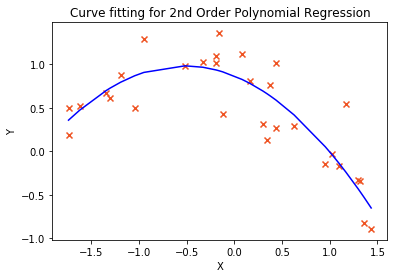

In [3]:
# Q.1-2 - 2nd Order Polynomial Regression

def generatePolynomialInput(df, order):
    for i in range(2,order+1):
        df[i] = df['x']**i
    return df

def performPolynomialRegression(df, learning_rate, iters, order):
    beta = np.matrix(np.zeros(order+1))
    #print(df.head())
    normalized_df_poly = generatePolynomialInput(df, order)
    #print(normalized_df_poly.head())
    X, Y = normalizeData(normalized_df_poly, True); # Normalize the data for proper scaling
    XM = np.matrix(X.values)
    YM = np.matrix(Y.values)
    Xcord = list(XM[:,1].flat)
    Ycord = list(YM[:,0].flat)
    beta, costs, rmse = gradientDescentUsingMatrix(XM, YM, beta, learning_rate, iters)
    y_pred = XM * beta.T
    drawPlot(Xcord, Ycord, y_pred, order, '');
    return beta, rmse


df = data1;
beta, rmse = performPolynomialRegression(df, 0.5, 10000, 2)
print(" Q.1-2 - 2nd Order Polynomial Regression, Optimized Weights are -\n",beta)
print(" Q.1-2 - 2nd Order Polynomial Regression, RMSE is - " + colored('RMSE is - ' + str(rmse), 'green'))

 Q.1-3 - 4th Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.10039392 -1.17681667 -0.6637961   0.36229393]]
 Q.1-3 - 4th Order Polynomial Regression, RMSE is - RMSE is - 0.20207035442606053


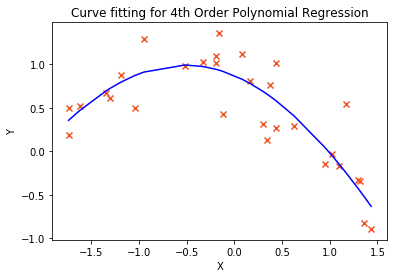

In [4]:
# Q.1-3 - 4th Order Polynomial Regression

# Normalize the data for proper scaling
df = data1;
beta, rmse = performPolynomialRegression(df, 0.5, 10000, 4)
print(" Q.1-3 - 4th Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-3 - 4th Order Polynomial Regression, RMSE is - " + colored('RMSE is - ' + str(rmse), 'green'))

 Q.1-4 - 16th Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.05509834 -0.59245275 -0.90636536 -0.66605292 -0.28806158
   0.05427814  0.30171812  0.44372399  0.48908118  0.45304357  0.35183622
   0.20044085  0.01185074 -0.20302971 -0.43522176 -0.67742135]]
 Q.1-4 - 16th Order Polynomial Regression, RMSE is - 0.18622226845119225


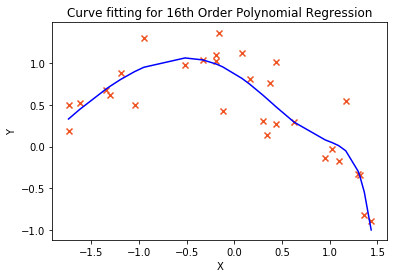

In [5]:
# Q.1-4 - 16th Order Polynomial Regression

df = data1;
beta, rmse = performPolynomialRegression(df, 0.1, 10000, 16)
print(" Q.1-4 - 16th Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-4 - 16th Order Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))

In [6]:
# #Q.1-5 16th Order Ridge Polynomial Regression

# def get_rmse2(x, y, beta, lamda):
# #     print(x.shape)
# #     print(y.shape)
# #     print(beta.shape)
# #     print(type(x))
# #     print(type(y))
# #     print(type(beta))
#     m = len(x)
#     inner = np.power(((x * beta) - y), 2)
#     sq_sum = np.sum(inner)
#     cost = (1/(2*m)) * (sq_sum + (lamda * np.sum(np.power(beta,2))))
#     return math.sqrt(cost)

# def ridgeGradientDescent(X, Y, alpha, iters, lamda):
#     x=np.matrix(X)
#     y=np.matrix(Y).transpose()
#     m, n = np.shape(X)
#     beta = np.matrix(np.ones(n)).transpose()
#     XT = x.transpose()
#     old_cost = sys.maxsize
#     new_cost = sys.maxsize
#     cost_history = []
#     for i in range(0, iters):
#         y_new = np.dot(X, beta)
#         error = y_new - y
#         old_cost = new_cost
#         new_cost = get_rmse2(np.matrix(X), y, beta, lamda)
#         if(abs(old_cost - new_cost) < 0.00001):
#             print("breaking" + str(old_cost) + str(new_cost))
#             break;
#         cost_history.append(new_cost)
#         #print("iteration:", i, "RMSE:", str(new_cost))
#         old_gradient = np.dot(XT, error) / m
#         beta = beta - alpha * (old_gradient + (lamda/m)*beta)
#     print(beta)
#     plt.plot(cost_history)
#     plt.show()
#     return beta, new_cost

# def performRidgePolynomialRegression(df, learning_rate, iters, order, lamda):
#     beta = np.matrix(np.zeros(order+1))
#     #print(df.head())
#     normalized_df_poly = generatePolynomialInput(df, order)
#     #print(normalized_df_poly.head())
#     X, Y = normalizeData(normalized_df_poly, True); # Normalize the data for proper scaling
#     XM = np.matrix(X.values)
#     YM = np.matrix(Y.values)
#     Xcord = list(XM[:,1].flat)
#     Ycord = list(YM[:,0].flat)
#     beta, rmse = ridgeGradientDescent(X, Y, learning_rate, iters, lamda)
#     y_pred = XM * beta
#     drawPlot(Xcord, Ycord, y_pred, order,'');
#     return beta, rmse

# df = data1;
# beta, rmse = performRidgePolynomialRegression(df, 0.0001, 10000, 16, 0.1)
# print(" Q.1-5 - 16th Order Polynomial Regression, Optimized Weights are -\n", beta)
# print(" Q.1-5 - 16th Order Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))

Q. 1-6. 16th Order Polynomial Regression SKlearn Ridge model, Optimized Weights are
[[  0.00000000e+00   1.88255999e+01  -3.04472997e+02   2.16090688e+03
   -7.20213386e+03   8.30605687e+03   1.21247361e+04  -3.70299000e+04
    6.31895728e+03   4.38543809e+04  -3.40833156e+02  -5.07510920e+04
   -1.93907691e+04   5.14989422e+04   4.01750205e+04  -7.60559405e+04
    2.66170096e+04]]
 Q.1-6 - 16th Order Polynomial Regression SKlearn Ridge model, RMSE is - 0.3621847277093697


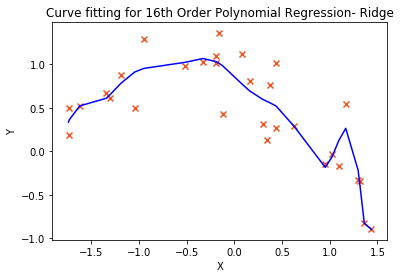

In [7]:
# 1-6 16th Order Polynomial Regression scikit-learn Ridge model

df = data1;
normalized_df_poly = generatePolynomialInput(df, 16)
X, Y = normalizeData(normalized_df_poly, True); # Normalize the data for proper scaling
# this Alpha(Regularization Strength) value gives the lowest cost
clf = Ridge(alpha=0.000000000001, copy_X = True, fit_intercept = True, max_iter = None, normalize=False, 
      random_state=None, solver ='auto', tol=0.001)
clf.fit(X,Y)

beta = clf.coef_
Ypred = clf.predict(X)

print("Q. 1-6. 16th Order Polynomial Regression SKlearn Ridge model, Optimized Weights are\n" + str(beta))
print(" Q.1-6 - 16th Order Polynomial Regression SKlearn Ridge model, " + colored('RMSE is - ' + str(get_rmse(np.matrix(X), np.matrix(Y), beta)), 'green'))
XM = np.matrix(X.values)
YM = np.matrix(Y.values)
Xcord = list(XM[:,1].flat)
Ycord = list(YM[:,0].flat)
drawPlot(Xcord, Ycord, Ypred, 16, "- Ridge")

(1, 17)
Q. 1-7. 16th Order Polynomial Regression SKlearn Lasso model, Optimized Weights are
  (0, 1)	0.846269169673
  (0, 3)	-0.972280343025
  (0, 4)	-1.38110195065
  (0, 9)	2.29389064195
  (0, 16)	-1.20122107359
 Q.1-7 - 16th Order Polynomial Regression SKlearn Lasso model, RMSE is - 0.3700440302119924


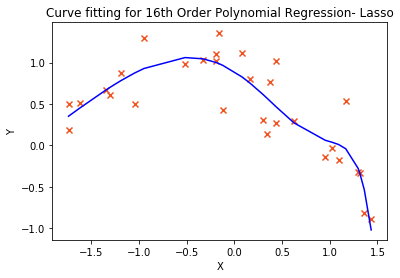

In [14]:
# 1-7 16th Order Polynomial Regression scikit-learn Lasso model

df = data1;
normalized_df_poly = generatePolynomialInput(df, 16)
X, Y = normalizeData(normalized_df_poly, True); # Normalize the data for proper scaling
# this Alpha(Regularization Strength) value gives the lowest cost
clf = Lasso(alpha=0.0001, copy_X = True, fit_intercept = True, max_iter = 1000000, normalize=False, 
      positive=False, precompute=False, random_state=None, selection = 'cyclic', tol=0.0001, warm_start=False)
clf.fit(X,Y)

beta = clf.sparse_coef_
Ypred = clf.predict(X)
print(beta.shape)
print("Q. 1-7. 16th Order Polynomial Regression SKlearn Lasso model, Optimized Weights are\n" + str(beta))
print(" Q.1-7 - 16th Order Polynomial Regression SKlearn Lasso model, " + colored('RMSE is - ' + str(get_rmse(np.matrix(X), np.matrix(Y), beta)), 'green'))
XM = np.matrix(X.values)
YM = np.matrix(Y.values)
Xcord = list(XM[:,1].flat)
Ycord = list(YM[:,0].flat)

drawPlot(Xcord, Ycord, Ypred, 16, "- Lasso")